In [ ]:
import numpy as np
import utils.dirutils as dd
import matplotlib.pyplot as plt
import os
import os.path
import fnmatch
import re
%matplotlib widget

In [ ]:
cd ~/Data/con_test

In [145]:
includes = ['*0000L3*test_dt10x.h5'] # for files only
# includes = ['*0000L6*test.h5'] # for files only
excludes = [''] # for dirs and files

# transform glob patterns to regular expressions
includes = r'|'.join([fnmatch.translate(x) for x in includes])
excludes = r'|'.join([fnmatch.translate(x) for x in excludes]) or r'$.'

legends = [None]
for root, dirs, files in os.walk(os.getcwd()):
    
    # exclude/include files
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(includes, f)]
    files = [f for f in files if not re.match(excludes, f)]

sfiles = sorted(files, key=lambda x: int(x.split('/')[-1].split('L')[0]))



In [146]:
sfiles

['/home/quojinhao/Data/con_test/10000L3con_test_dt10x.h5',
 '/home/quojinhao/Data/con_test/20000L3con_test_dt10x.h5',
 '/home/quojinhao/Data/con_test/30000L3con_test_dt10x.h5',
 '/home/quojinhao/Data/con_test/40000L3con_test_dt10x.h5',
 '/home/quojinhao/Data/con_test/50000L3con_test_dt10x.h5',
 '/home/quojinhao/Data/con_test/60000L3con_test_dt10x.h5',
 '/home/quojinhao/Data/con_test/70000L3con_test_dt10x.h5',
 '/home/quojinhao/Data/con_test/80000L3con_test_dt10x.h5',
 '/home/quojinhao/Data/con_test/90000L3con_test_dt10x.h5',
 '/home/quojinhao/Data/con_test/100000L3con_test_dt10x.h5']

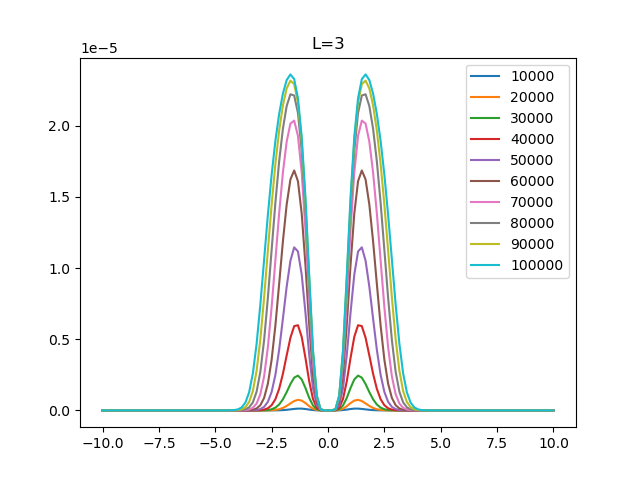

In [147]:
legends = []
plt.figure()
for file in sfiles:
    data = dd.retrieve(file)
    Lx = data['Lx']
    Nx = data['Nx']
    Ly = data['Ly']
    Ny = data['Ny']
    Lz = data['Lz']
    Nz = data['Nz']
    x = np.linspace(-Lx, Lx, Nx)
    y = np.linspace(-Ly, Ly, Ny)
    z = np.linspace(-Lz, Lz, Nz)
    dx = np.diff(x)[0]
    dy = np.diff(y)[0]
    dz = np.diff(z)[0]
    psiE = data['psiE']
    plt.plot(x, np.abs(psiE[60,:,60])**2*dx*dy*dz)
    legends.append(file.split('/')[-1].split('L')[0])
L = dd.retrieve(sfiles[0])['L']
plt.title(f"L={L}")

plt.legend(legends)
plt.show()

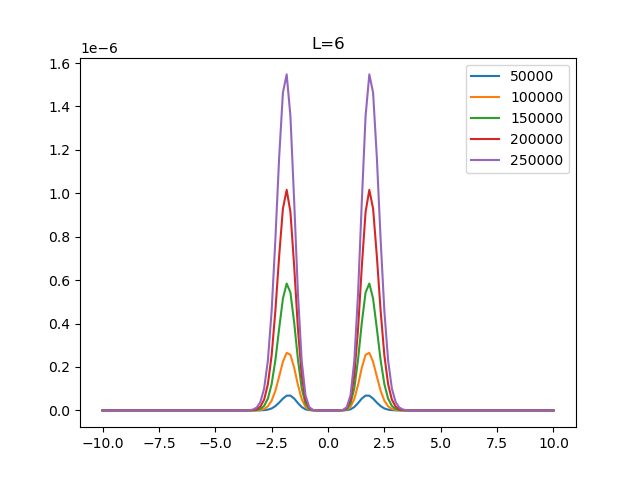

In [133]:
legends = []
plt.figure()
for file in sfiles:
    data = dd.retrieve(file)
    Lx = data['Lx']
    Nx = data['Nx']
    Ly = data['Ly']
    Ny = data['Ny']
    Lz = data['Lz']
    Nz = data['Nz']
    x = np.linspace(-Lx, Lx, Nx)
    y = np.linspace(-Ly, Ly, Ny)
    z = np.linspace(-Lz, Lz, Nz)
    dx = np.diff(x)[0]
    dy = np.diff(y)[0]
    dz = np.diff(z)[0]
    psiE = data['psiE']
    plt.plot(x, np.abs(psiE[60,:,60])**2*dx*dy*dz)
    legends.append(file.split('/')[-1].split('L')[0])
L = dd.retrieve(sfiles[0])['L']
plt.title(f"L={L}")

plt.legend(legends)
plt.show()

In [ ]:
cd ~/Data/con_test

In [126]:
path1 = "250000L6con_test.h5"
data1 = dd.retrieve(path1)
conG1 = data1['convergeG']
conE1 = data1['convergeE']
dw1 = data1['dw']
n1 = data1['nj']

path = "25000L6con_test_dt10x.h5"
data = dd.retrieve(path)
conG = data['convergeG']
conE = data['convergeE']
dw = data['dw']
n = data['nj']

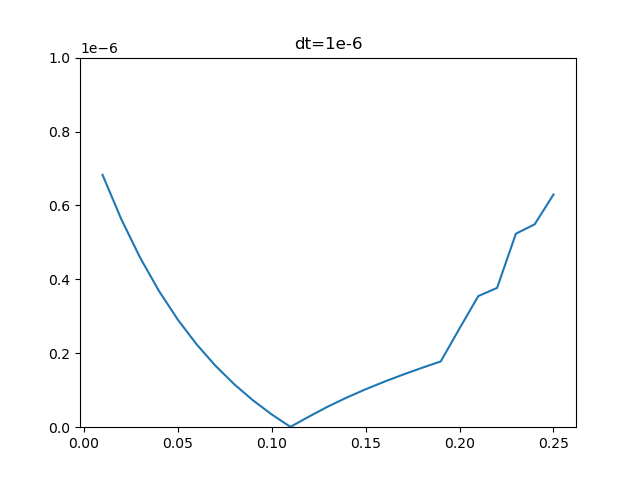

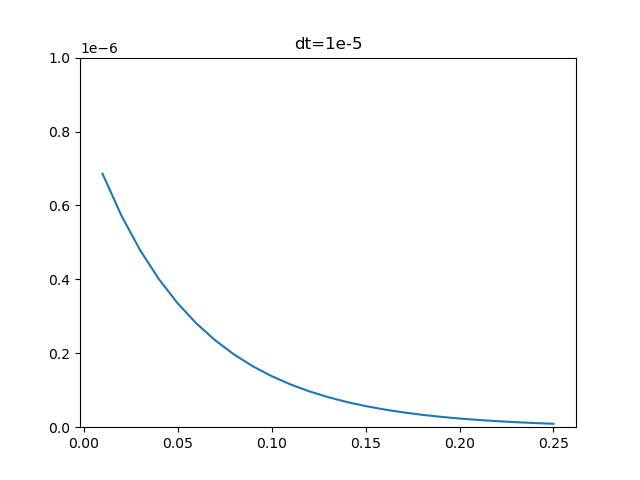

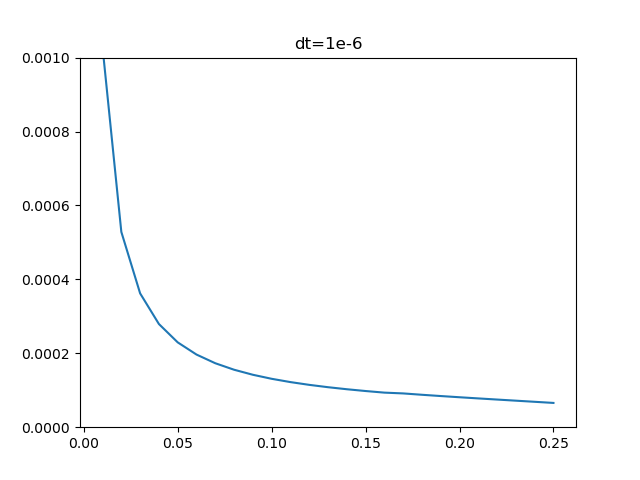

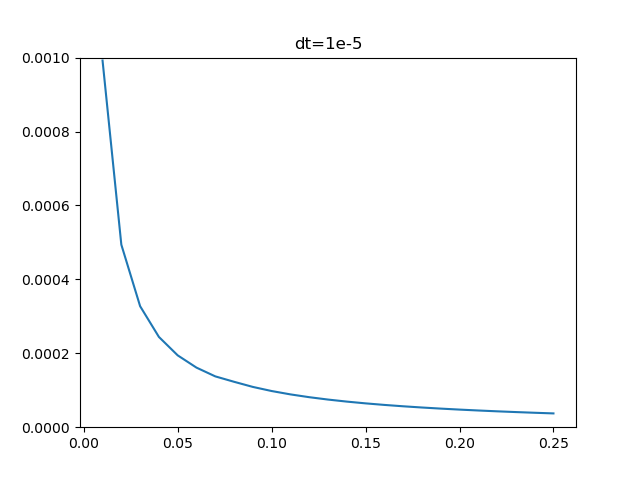

In [128]:

plt.figure()
plt.title('dt=1e-6')
x = np.arange(50000,250000+1,50000)*dw1
plt.plot(x,conG1[1:])
plt.ylim([0,1e-6])

plt.show()

plt.figure()
plt.title('dt=1e-5')
x = np.arange(1000,25000+1,1000)*dw
plt.plot(x,conG[1:])
plt.ylim([0,1e-6])
plt.show()


plt.figure()
plt.title('dt=1e-6')
x = np.arange(50000,250000+1,50000)*dw1
plt.plot(x,conE1[1:])
plt.ylim([0,1e-4])

plt.show()

plt.figure()
plt.title('dt=1e-5')
x = np.arange(1000,25000+1,1000)*dw
plt.plot(x,conE[1:])
plt.ylim([0,1e-4])
plt.show()




In [78]:
plt.close()

In [110]:
import utils.plotter as pp

In [112]:
cd ~/Data/con_test

/home/quojinhao/Data/con_test


/opt/conda/envs/DASK/lib/python3.9/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.figure.savefig(buf, format='png', dpi='figure')


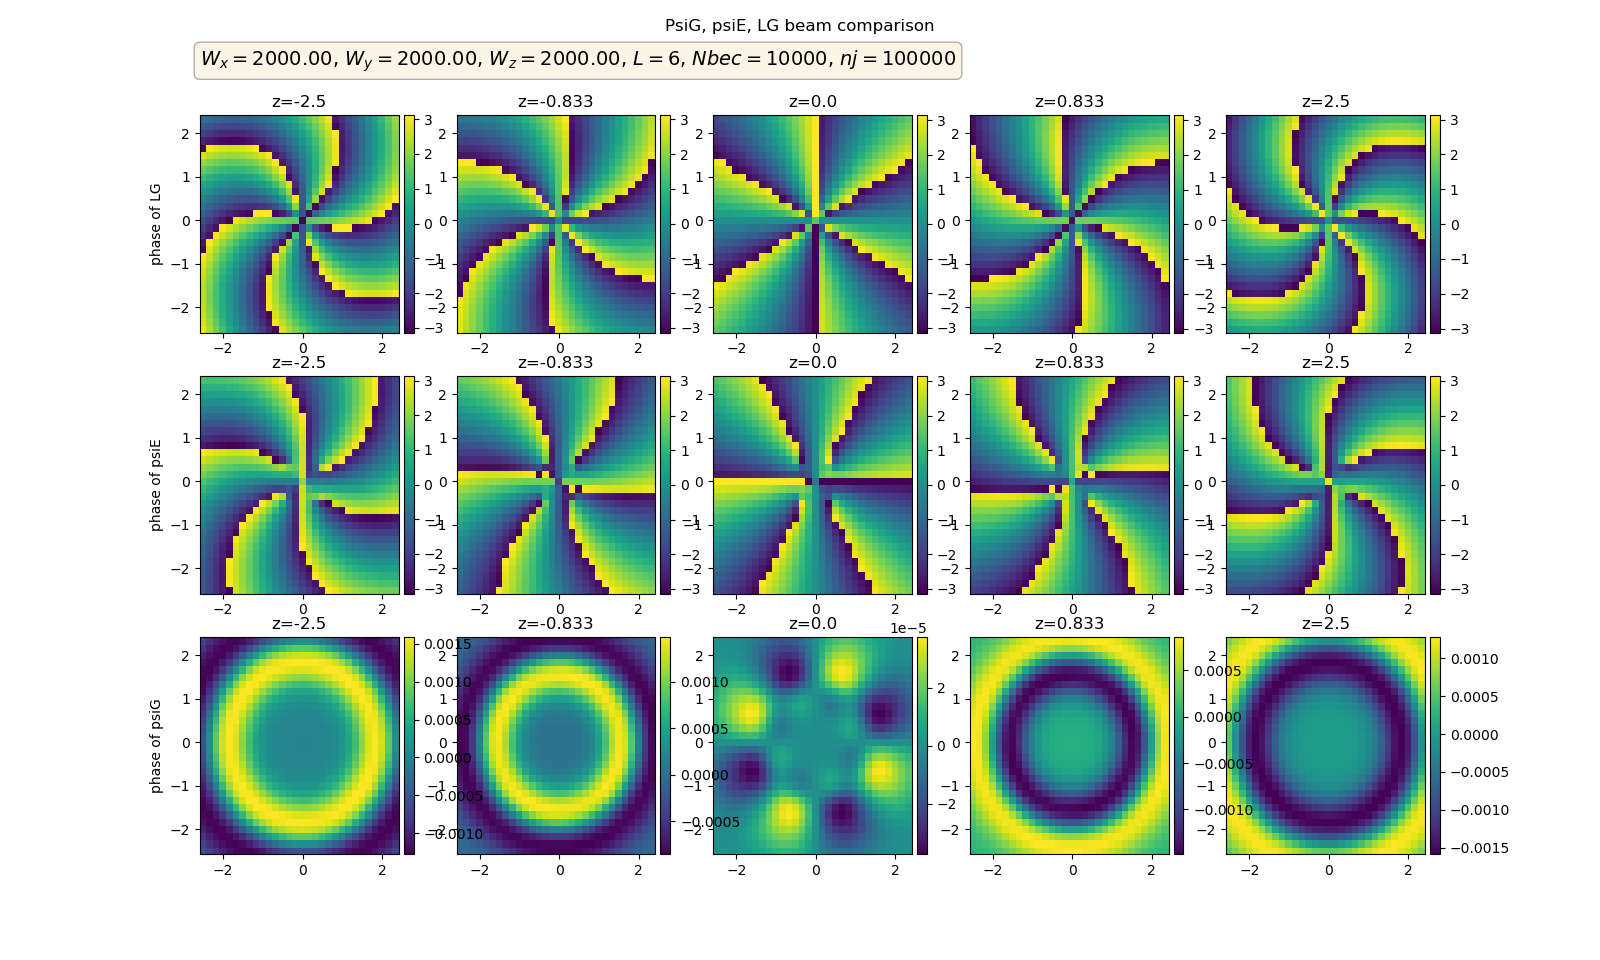

In [129]:
path = "25000L6con_test_dt10x.h5"
pp.plotdata(path,zindice=[45,55,60,65,75] ,lims=[(45,75),(45,75),(45,75)], plotwhat='phase')

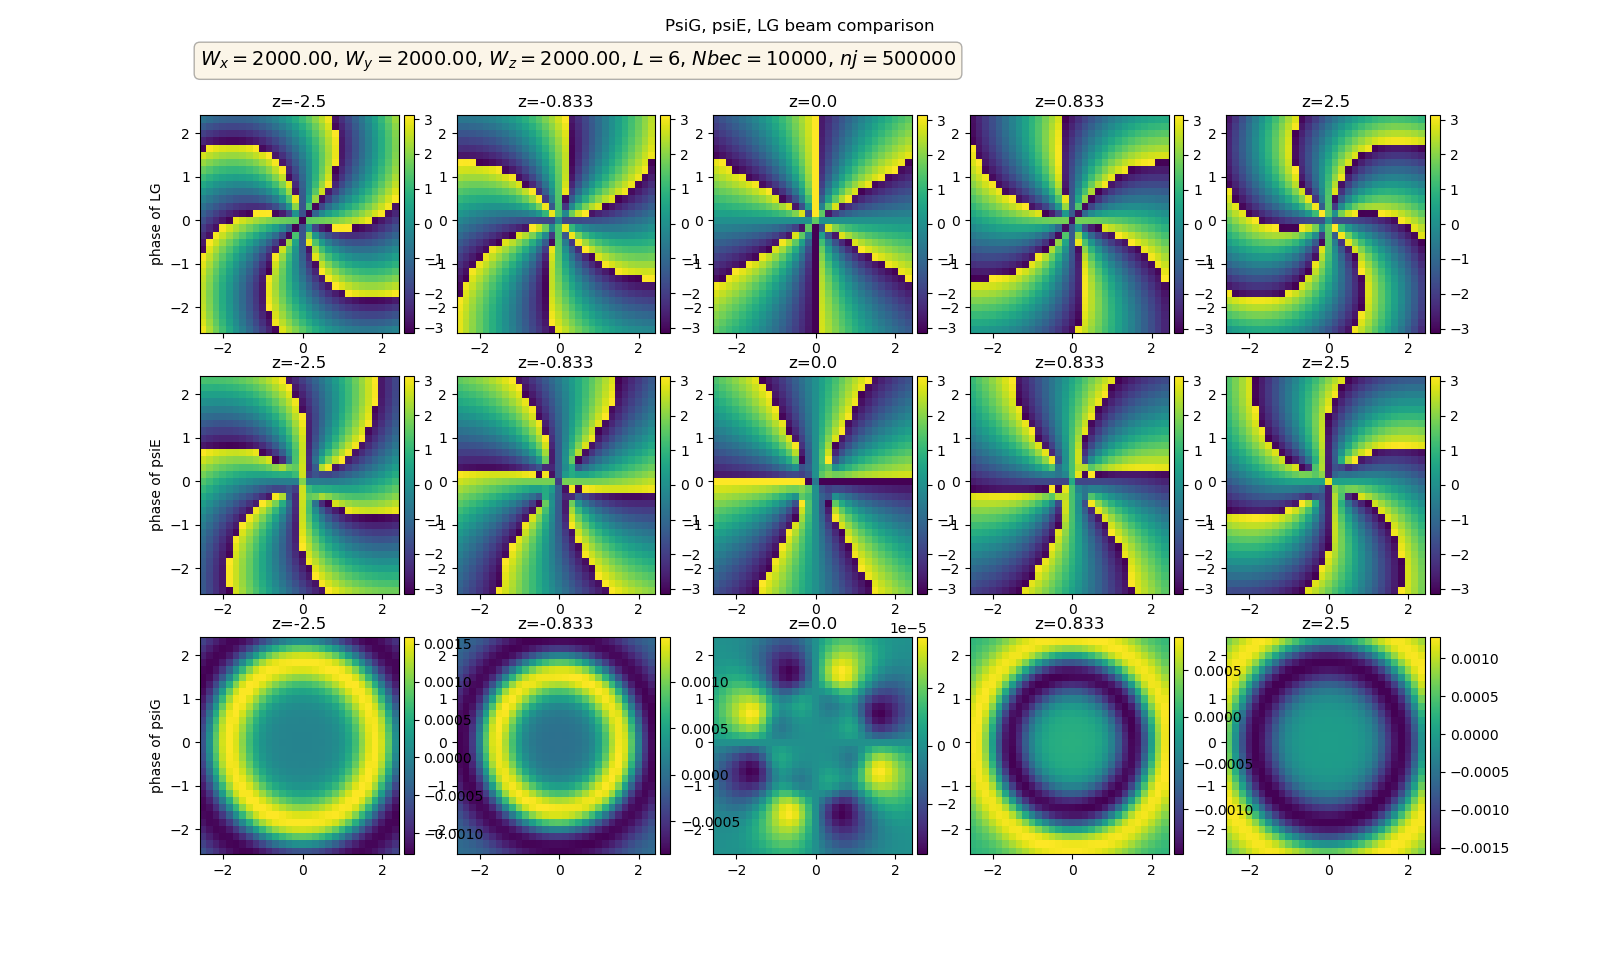

In [130]:
path = "250000L6con_test.h5"
pp.plotdata(path,zindice=[45,55,60,65,75] ,lims=[(45,75),(45,75),(45,75)], plotwhat='phase')